# Dataset Information
### Additional Information

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).<br>


[<b>Dataset link here</b>](https://archive.ics.uci.edu/dataset/320/student+performance)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
3 age - student's age (numeric: from 15 to 22)<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - extra educational support (binary: yes or no)<br>
17 famsup - family educational support (binary: yes or no)<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 activities - extra-curricular activities (binary: yes or no)<br>
20 nursery - attended nursery school (binary: yes or no)<br>
21 higher - wants to take higher education (binary: yes or no)<br>
22 internet - Internet access at home (binary: yes or no)<br>
23 romantic - with a romantic relationship (binary: yes or no)<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - number of school absences (numeric: from 0 to 93)<br>

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)<br>
31 G2 - second period grade (numeric: from 0 to 20)<br>

32 G3 - final grade (numeric: from 0 to 20, output target)<br>

# Importing Libraries

In [1]:
#Computational Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor Librares
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Tuning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Algorithm Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, plot_tree
from lightgbm import LGBMRegressor

#Evaluation Libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Showcasing functions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("student_mat_2173a47420.csv", sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [3]:
df.shape

(395, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [6]:
df.isna().sum().sum()

0

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

print("Categorical Columns = ", categorical_columns)
print("\n")
print("Numerical Columns = ", numerical_columns)

Categorical Columns =  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


Numerical Columns =  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [9]:
for i in categorical_columns:
    print(i, " - ", df[i].unique())

school  -  ['GP' 'MS']
sex  -  ['F' 'M']
address  -  ['U' 'R']
famsize  -  ['GT3' 'LE3']
Pstatus  -  ['A' 'T']
Mjob  -  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  -  ['teacher' 'other' 'services' 'health' 'at_home']
reason  -  ['course' 'other' 'home' 'reputation']
guardian  -  ['mother' 'father' 'other']
schoolsup  -  ['yes' 'no']
famsup  -  ['no' 'yes']
paid  -  ['no' 'yes']
activities  -  ['no' 'yes']
nursery  -  ['yes' 'no']
higher  -  ['yes' 'no']
internet  -  ['no' 'yes']
romantic  -  ['no' 'yes']


# Gender Comparison

In [10]:
def gender_aspect(data):
    sns.set(style="darkgrid")

    # Create a countplot
    ax = sns.countplot(data=data, x='sex')

    # Calculate total number of students
    total = data.shape[0]

    # Annotate each bar with its count value above the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='black',
                    xytext=(0, 10),
                    textcoords='offset points')

    # Annotate each bar with its percentage inside the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{round((height * 100 / total), 2)}%',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='white',  # Set the text color to white for better visibility inside the bar
                    xytext=(0, 0),
                    textcoords='offset points')

    plt.title("Male V/S Female")
    plt.xlabel("Students")
    plt.ylabel("Gender")
    plt.show()


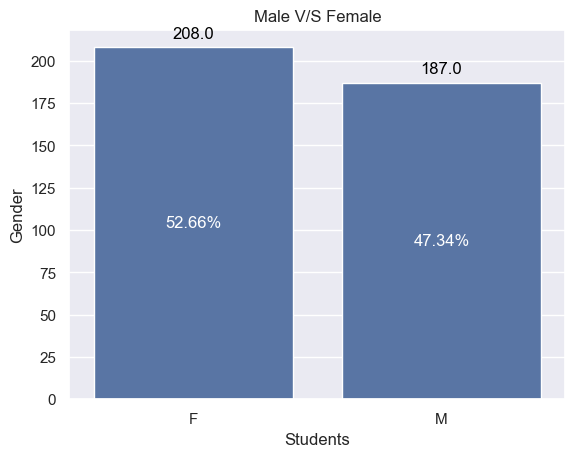

In [11]:
gender_aspect(df)

In [12]:
def schooling(data):
    sns.set(style="darkgrid")

    # Create a countplot
    ax = sns.countplot(data=data, 
                       x='sex',
                       hue="school")

    # Calculate total number of students
    total = data.shape[0]

    # Annotate each bar with its count value above the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='black',
                    xytext=(0, 10),
                    textcoords='offset points')

    # Annotate each bar with its percentage inside the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{round((height * 100 / total), 2)}%',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='white',  # Set the text color to white for better visibility inside the bar
                    xytext=(0, 0),
                    textcoords='offset points')

    plt.title("Male Schooling V/S Female Schooling")
    plt.xlabel("Students")
    plt.ylabel("Gender")
    plt.show()

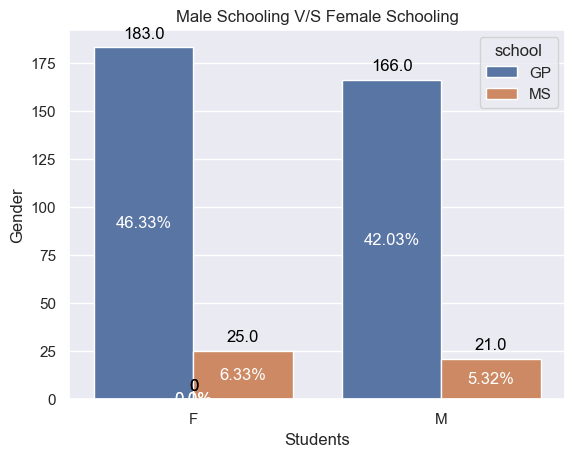

In [13]:
schooling(df)

In [14]:
def location_variant(data):
    sns.set(style="darkgrid")

    # Create a countplot
    ax = sns.countplot(data=data, 
                       x='sex',
                       hue="address", 
                       palette="Set3")

    # Calculate total number of students
    total = data.shape[0]

    # Annotate each bar with its count value above the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='black',
                    xytext=(0, 10),
                    textcoords='offset points')

    # Annotate each bar with its percentage inside the bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{round((height * 100 / total), 2)}%',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='white',  # Set the text color to white for better visibility inside the bar
                    xytext=(0, 0),
                    textcoords='offset points')

    plt.title("Male Schooling V/S Female Schooling")
    plt.xlabel("Students")
    plt.ylabel("Gender")
    plt.show()

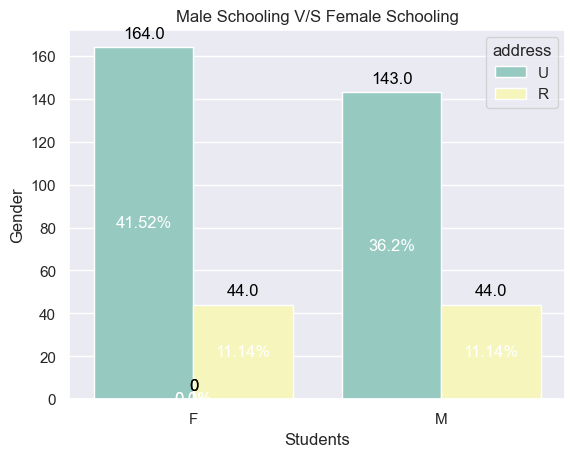

In [15]:
location_variant(df)

### Age distribution across different schools

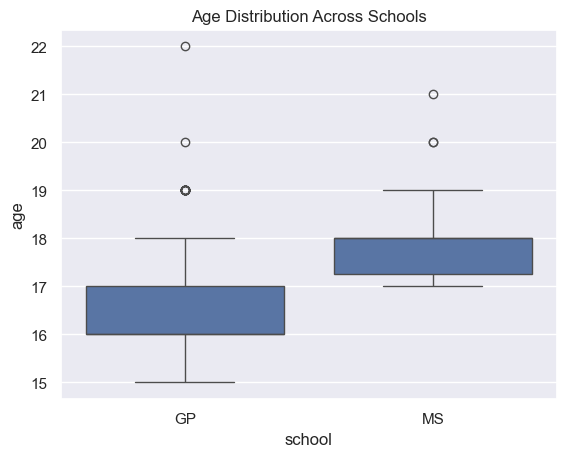

In [16]:
sns.boxplot(x='school', y='age', data=df)
plt.title('Age Distribution Across Schools')
plt.show()

### Study time distribution across different family sizes

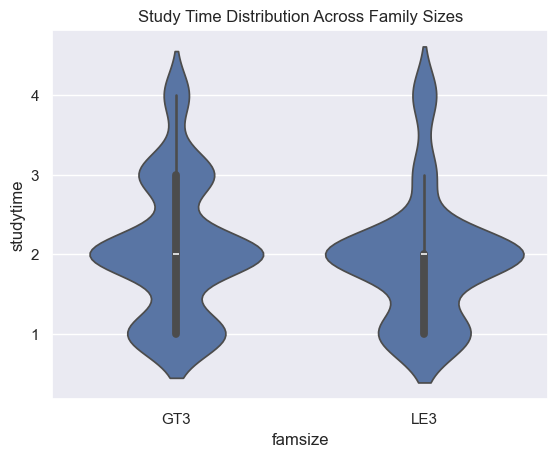

In [17]:
sns.violinplot(x='famsize', y='studytime', data=df)
plt.title('Study Time Distribution Across Family Sizes')
plt.show()

### Average failures based on guardian

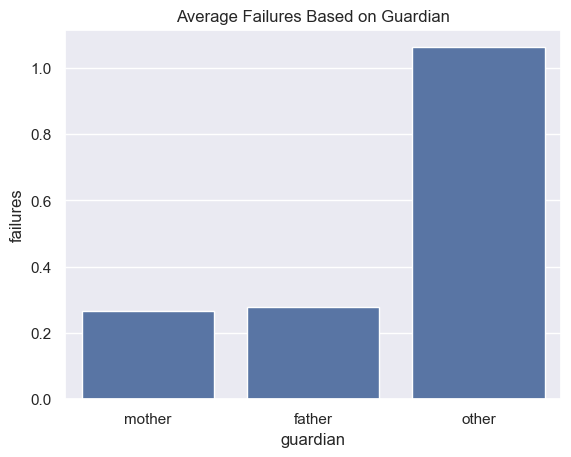

In [18]:
sns.barplot(x='guardian', y='failures', data=df, errorbar=None)
plt.title('Average Failures Based on Guardian')
plt.show()

### Count of students by internet availability


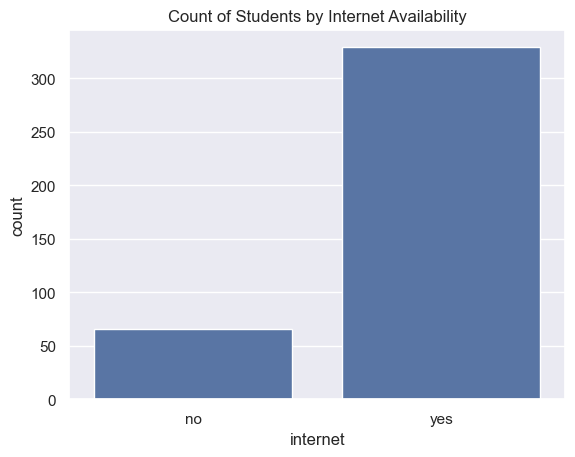

In [19]:
sns.countplot(x='internet', data=df)
plt.title('Count of Students by Internet Availability')
plt.show()

### Heatmap of the correlation between mother's and father's education levels

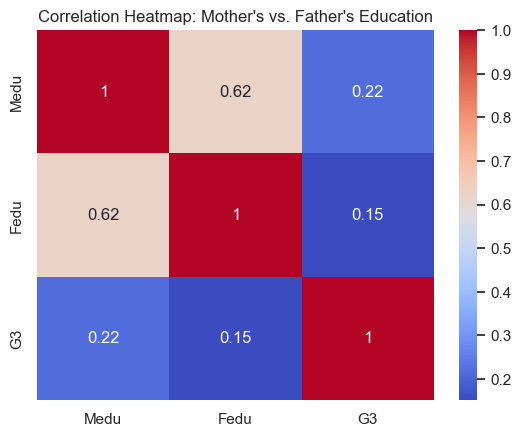

In [20]:
edu_corr = df[['Medu', 'Fedu', 'G3']].corr()
sns.heatmap(edu_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Mother's vs. Father's Education")
plt.show()

### Age Anlaysis for the range of observations

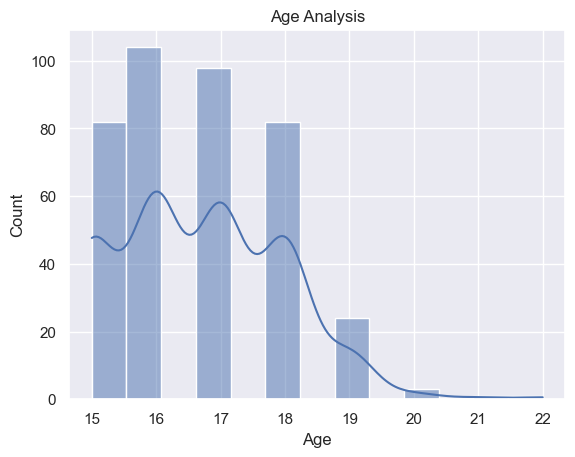

In [21]:
sns.histplot(data = df, x = "age", kde=True)
plt.title("Age Analysis")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### How many students performed good in G2 wrt G1

In [22]:
growth_df = df.loc[np.where(df.G2 >df.G1)]
growth_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15
11,GP,F,15,U,GT3,T,2,1,services,other,reputation,father,3,3,0,no,yes,no,yes,yes,yes,yes,no,5,2,2,1,1,4,4,10,12,12
14,GP,M,15,U,GT3,A,2,2,other,other,home,other,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,5,2,1,1,3,0,14,16,16
16,GP,F,16,U,GT3,T,4,4,services,services,reputation,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,no,3,2,3,1,2,2,6,13,14,14
17,GP,F,16,U,GT3,T,3,3,other,other,reputation,mother,3,2,0,yes,yes,no,yes,yes,yes,no,no,5,3,2,1,1,4,4,8,10,10
19,GP,M,16,U,LE3,T,4,3,health,other,home,father,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,1,3,1,3,5,4,8,10,10


### How many students do not performed good in G2 wrt G1

In [23]:
non_growth_df = df.loc[np.where(df.G2 < df.G1)]
non_growth_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
10,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9
18,GP,M,17,U,GT3,T,3,2,services,services,course,mother,1,1,3,no,yes,no,yes,yes,yes,yes,no,5,5,5,2,4,5,16,6,5,5
24,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8
31,GP,M,15,U,GT3,T,4,4,services,services,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,1,1,1,5,0,17,16,17
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,course,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,4,5,2,1,1,5,0,17,16,16
35,GP,F,15,U,GT3,T,2,3,other,other,other,father,2,1,0,no,yes,no,yes,yes,yes,no,no,3,5,1,1,1,5,0,8,7,6
39,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,mother,1,1,0,yes,yes,yes,yes,yes,yes,no,no,4,3,1,1,1,2,8,14,13,13
42,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18


### Overall Growth Summary

In [24]:
growth_rate = round(growth_df.shape[0]*100/df.shape[0],2)
non_growth_rate = round(non_growth_df.shape[0]*100/df.shape[0],2)

print("The Students who done something to achieve growth with respect to G1 are {}%".format(growth_rate))
print("The Students who did not do something to achieve growth with respect to G1 are {}%".format(non_growth_rate))

The Students who done something to achieve growth with respect to G1 are 32.41%
The Students who did not do something to achieve growth with respect to G1 are 37.97%


## Now Its time for Feature Engineering data

### 1. Feature Transformation
- Missing Value Imputation
- Removing Outliers
- Encoding Features

## Missing Values Imputation

In [25]:
df.isna().sum().to_frame()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


## Removing Outliers

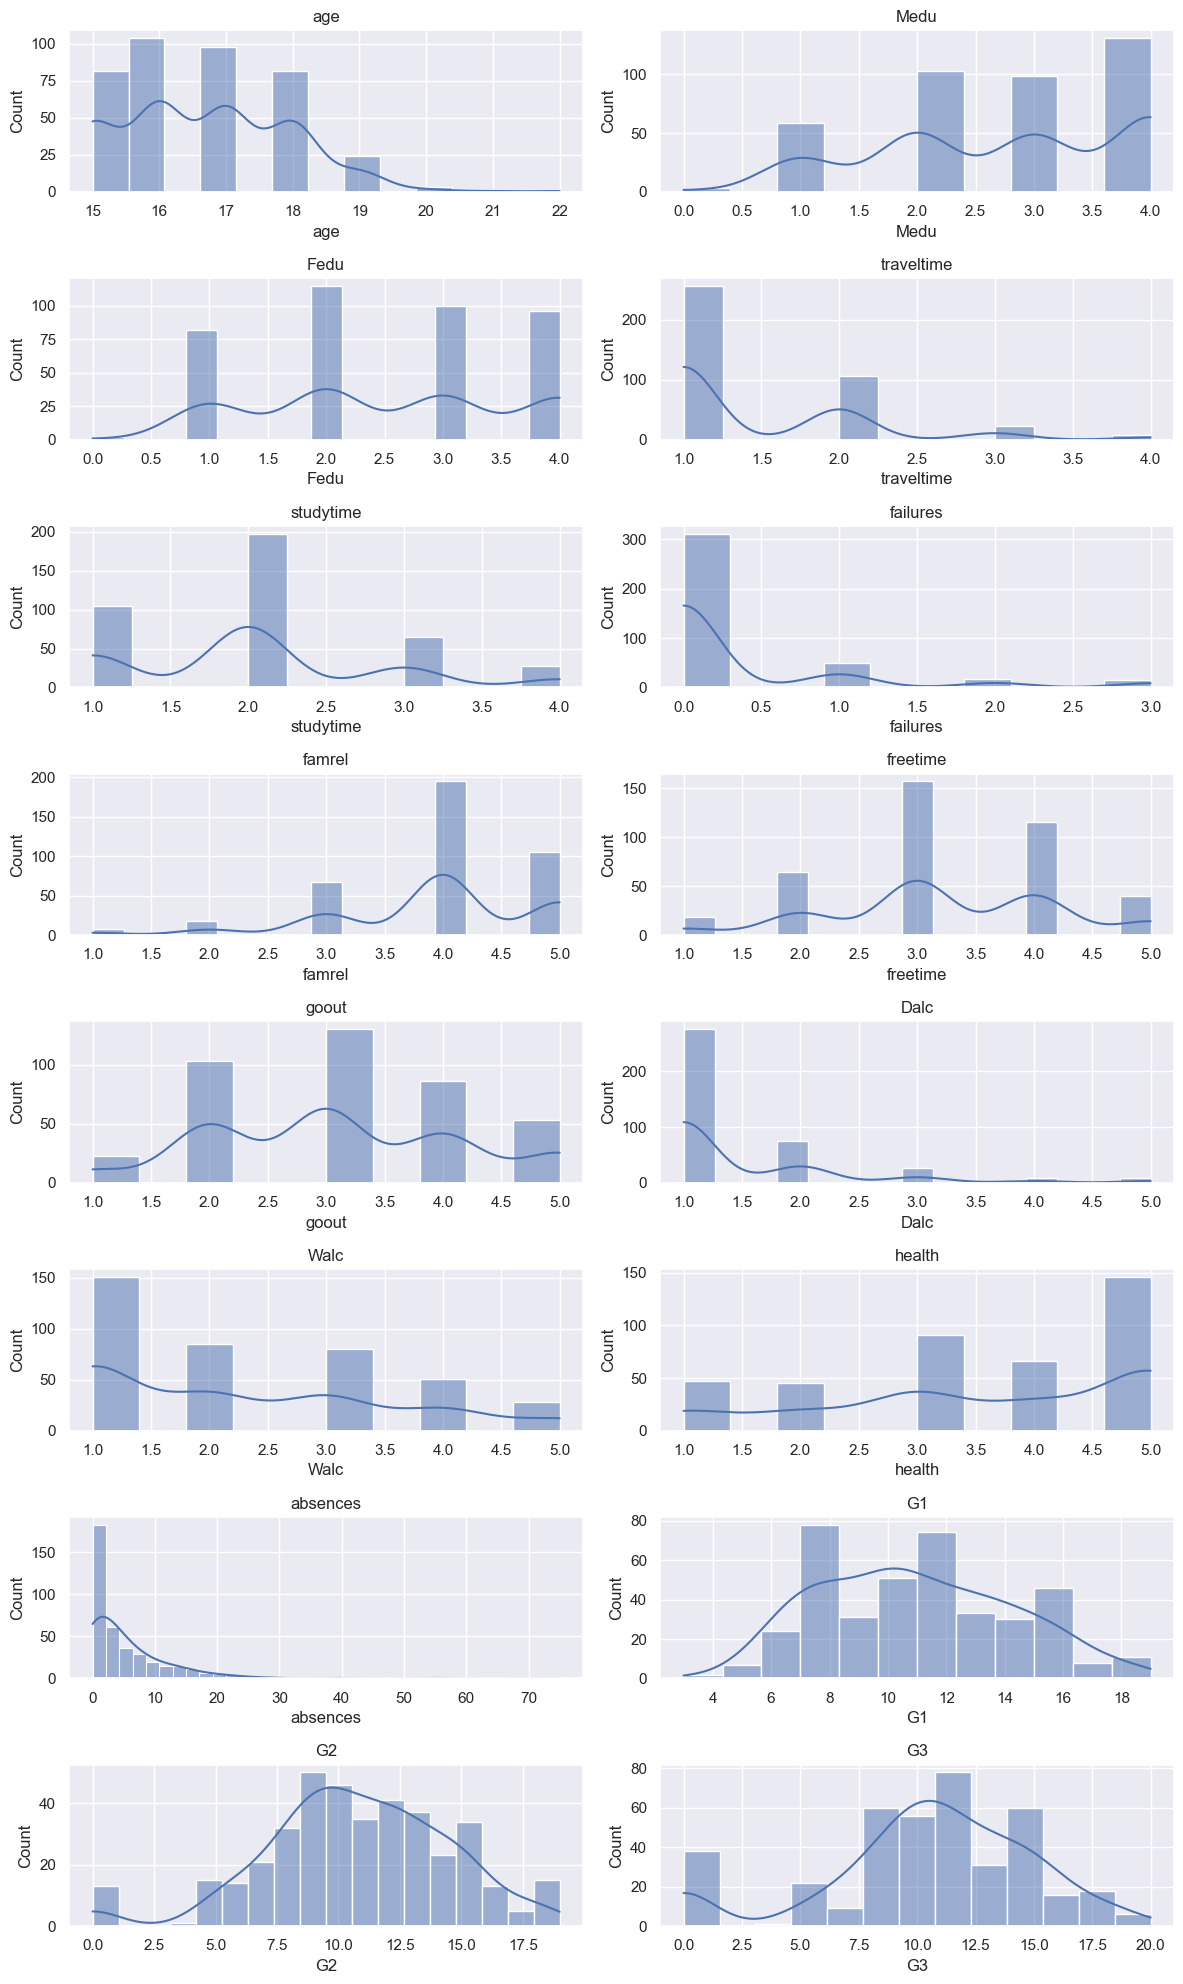

In [26]:
# Define the number of rows and columns for the subplot grid
num_rows = 8
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Iterate through numerical columns and plot on each subplot
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### The data is very less removing outliers will not bring strong algorithm

## Encoding Features

In [27]:
for i in categorical_columns:
    print(i, " - ", df[i].unique())

school  -  ['GP' 'MS']
sex  -  ['F' 'M']
address  -  ['U' 'R']
famsize  -  ['GT3' 'LE3']
Pstatus  -  ['A' 'T']
Mjob  -  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  -  ['teacher' 'other' 'services' 'health' 'at_home']
reason  -  ['course' 'other' 'home' 'reputation']
guardian  -  ['mother' 'father' 'other']
schoolsup  -  ['yes' 'no']
famsup  -  ['no' 'yes']
paid  -  ['no' 'yes']
activities  -  ['no' 'yes']
nursery  -  ['yes' 'no']
higher  -  ['yes' 'no']
internet  -  ['no' 'yes']
romantic  -  ['no' 'yes']


### Nominal and Ordinal differentiation

#### There is no order with respect to the catgeorical columns. Thus we need to go with One Hot  Encoding

### Before that we need to split the data into Training and testing

In [28]:
X = df.drop(columns="G3", axis=1)
y = df["G3"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 32), (79, 32), (316,), (79,))

In [31]:
categorical_transformers = [
    ('onehot', OneHotEncoder(), categorical_columns)
    ]

In [32]:
preprocessor = ColumnTransformer(
    transformers = categorical_transformers,
    remainder='passthrough')

In [33]:
pipeline = Pipeline([('preprocessor', preprocessor),
                    ("Satndardizer", StandardScaler())
                    ])

In [34]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('Satndardizer', StandardScaler())])

In [35]:
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((316, 58), (79, 58))

In [36]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)*100

(4.8159056405645115, 1.4689672442078865, 67.81178557363444)

In [37]:
from sklearn.linear_model import Ridge, Lasso
rr = Ridge()

rr.fit(X_train_transformed, y_train)

y_pred_rr = rr.predict(X_test_transformed)

mean_squared_error(y_test, y_pred_rr), mean_absolute_error(y_test, y_pred_rr), r2_score(y_test, y_pred_rr)*100

(4.765843833414448, 1.4644913223668587, 68.14638519069186)

In [38]:
lasso = Lasso()

lasso.fit(X_train_transformed, y_train)

y_pred_ls = lasso.predict(X_test_transformed)

mean_squared_error(y_test, y_pred_ls), mean_absolute_error(y_test, y_pred_ls), r2_score(y_test, y_pred_ls)*100

(2.50063995665843, 1.0630605099451966, 83.28639696548872)

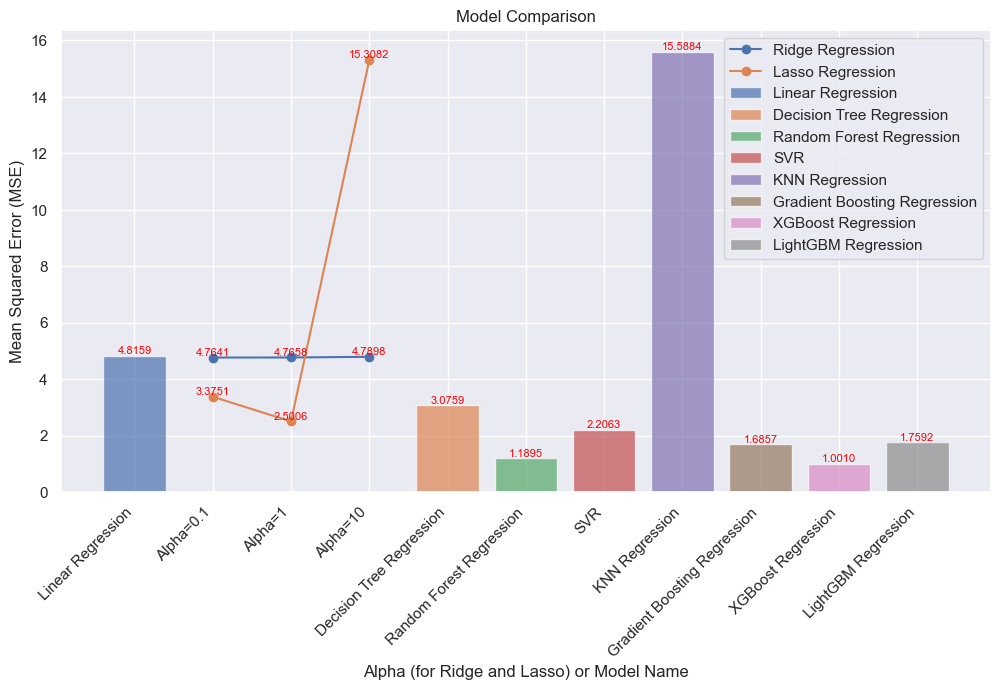

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)
lr_pred = lr_model.predict(X_test_transformed)

# Train Ridge Regression with different alpha values
ridge_models = {}
ridge_alphas = [0.1, 1, 10]
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_transformed, y_train)
    ridge_models[alpha] = ridge_model

# Train Lasso Regression with different alpha values
lasso_models = {}
lasso_alphas = [0.1, 1, 10]
for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_transformed, y_train)
    lasso_models[alpha] = lasso_model

# Train Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_transformed, y_train)
dt_pred = dt_model.predict(X_test_transformed)

# Train Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed, y_train)
rf_pred = rf_model.predict(X_test_transformed)

# Train Support Vector Regression (SVR)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_transformed, y_train.ravel())
svr_pred = svr_model.predict(X_test_transformed)

# Train K-Nearest Neighbors Regression (KNN Regression)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_transformed, y_train)
knn_pred = knn_model.predict(X_test_transformed)

# Train Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_transformed, y_train.ravel())
gb_pred = gb_model.predict(X_test_transformed)

# Train XGBoost Regression
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_transformed, y_train.ravel())
xgb_pred = xgb_model.predict(X_test_transformed)

# Train LightGBM Regression
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42,verbose=-1)
lgbm_model.fit(X_train_transformed, y_train.ravel())
lgbm_pred = lgbm_model.predict(X_test_transformed)

# Evaluate models and store results
models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_models,
    'Lasso Regression': lasso_models,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_model,
    'SVR': svr_model,
    'KNN Regression': knn_model,
    'Gradient Boosting Regression': gb_model,
    'XGBoost Regression': xgb_model,
    'LightGBM Regression': lgbm_model
}
results = {}

for model_name, model in models.items():
    if isinstance(model, dict):  # For Ridge and Lasso
        results[model_name] = {}
        for alpha, m in model.items():
            y_pred = m.predict(X_test_transformed)
            mse = mean_squared_error(y_test, y_pred)
            results[model_name][f'Alpha={alpha}'] = mse
    else:
        y_pred = model.predict(X_test_transformed)
        mse = mean_squared_error(y_test, y_pred)
        results[model_name] = mse

# Plot results
plt.figure(figsize=(12, 6))

for model_name, model_results in results.items():
    if isinstance(model_results, dict):  # For Ridge and Lasso
        alphas, mse_values = zip(*model_results.items())
        plt.plot(alphas, mse_values, label=model_name, marker='o')
        
        # Add text annotations
        for alpha, mse in zip(alphas, mse_values):
            plt.text(alpha, mse, f'{mse:.4f}', ha='center', va='bottom', fontsize=8, color='red')
    else:
        plt.bar(model_name, model_results, label=model_name, alpha=0.7)
        
        # Add text annotations
        plt.text(model_name, model_results, f'{model_results:.4f}', ha='center', va='bottom', fontsize=8, color='red')


plt.title('Model Comparison')
plt.xlabel('Alpha (for Ridge and Lasso) or Model Name')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.savefig("Results.png")
plt.show()

In [40]:
X_train = X_train_transformed.copy()
X_test = X_test_transformed.copy()

# Models

In [41]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Ridge Regression with hyperparameter tuning using GridSearchCV
ridge_param_grid = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

# Train Lasso Regression with hyperparameter tuning using GridSearchCV
lasso_param_grid = {'alpha': [0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_param_grid, cv=5)
lasso_grid.fit(X_train, y_train)

# Train Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Train Random Forest Regression with hyperparameter tuning using GridSearchCV
rf_param_grid = {'n_estimators': [50, 100, 200]}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)

# Train Support Vector Regression (SVR) with hyperparameter tuning using GridSearchCV
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=5)
svr_grid.fit(X_train, y_train.ravel())

# Train K-Nearest Neighbors Regression (KNN Regression) with hyperparameter tuning using GridSearchCV
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

# Train Gradient Boosting Regression with hyperparameter tuning using GridSearchCV
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5)
gb_grid.fit(X_train, y_train.ravel())

# Train XGBoost Regression with hyperparameter tuning using GridSearchCV
xgb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train.ravel())

# Train LightGBM Regression with hyperparameter tuning using GridSearchCV
lgbm_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
lgbm_grid = GridSearchCV(LGBMRegressor(verbose=-1), lgbm_param_grid, cv=5)
lgbm_grid.fit(X_train, y_train.ravel())


models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_grid.best_estimator_,
    'Lasso Regression': lasso_grid.best_estimator_,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_grid.best_estimator_,
    'SVR': svr_grid.best_estimator_,
    'KNN Regression': knn_grid.best_estimator_,
    'Gradient Boosting Regression': gb_grid.best_estimator_,
    'XGBoost Regression': xgb_grid.best_estimator_,
    'LightGBM Regression': lgbm_grid.best_estimator_
}

# Evaluation Function

In [42]:
# Function for model evaluation with different metrics
def evaluate_model(model, X, y, metrics=['mse', 'r2', 'mae']):
    evaluations = {}
    for metric in metrics:
        if metric == 'mse':
            y_pred = model.predict(X)
            evaluations['mse'] = mean_squared_error(y, y_pred)
        elif metric == 'r2':
            y_pred = model.predict(X)
            evaluations['r2'] = r2_score(y, y_pred)
        elif metric == 'mae':
            y_pred = model.predict(X)
            evaluations['mae'] = mean_absolute_error(y, y_pred)
    return evaluations

# Visualize the results

## MSE Results

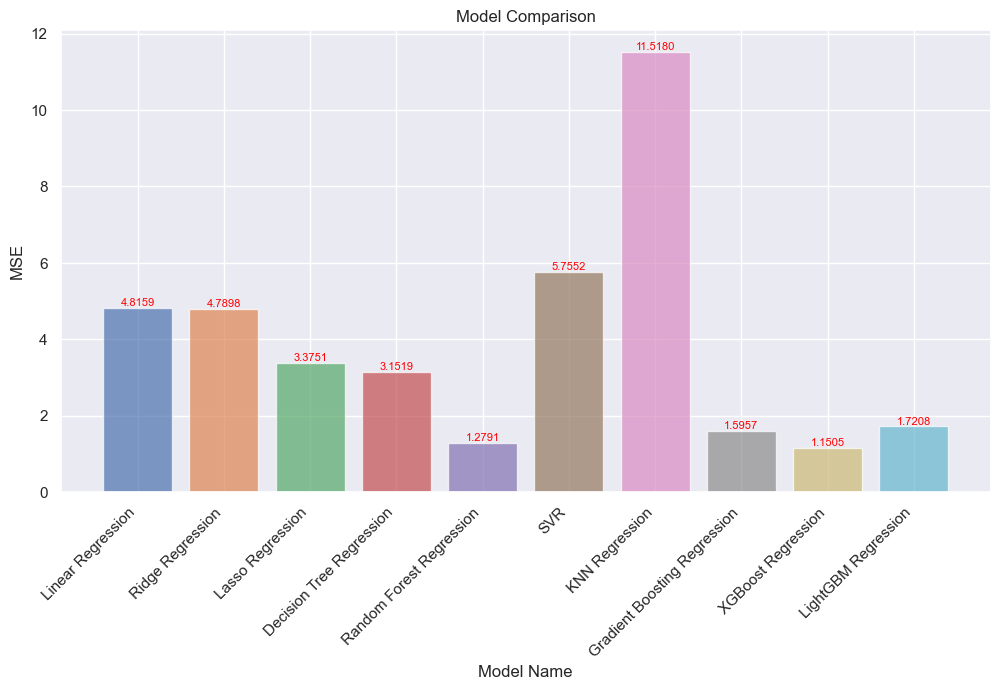

In [43]:
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    evaluations = evaluate_model(model, X_test, y_test, metrics=['mse'])
    mse_value = evaluations['mse']
    
    plt.bar(model_name, mse_value, alpha=0.7, label=f"{model_name} - MSE: {mse_value:.4f}")
    
    # Display the numerical value on top of the bar
    plt.text(model_name, mse_value + 0.001, f'{mse_value:.4f}', ha='center', va='bottom', fontsize=8, color='Red')

plt.title('Model Comparison')
plt.xlabel('Model Name')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.show()

## MAE Results

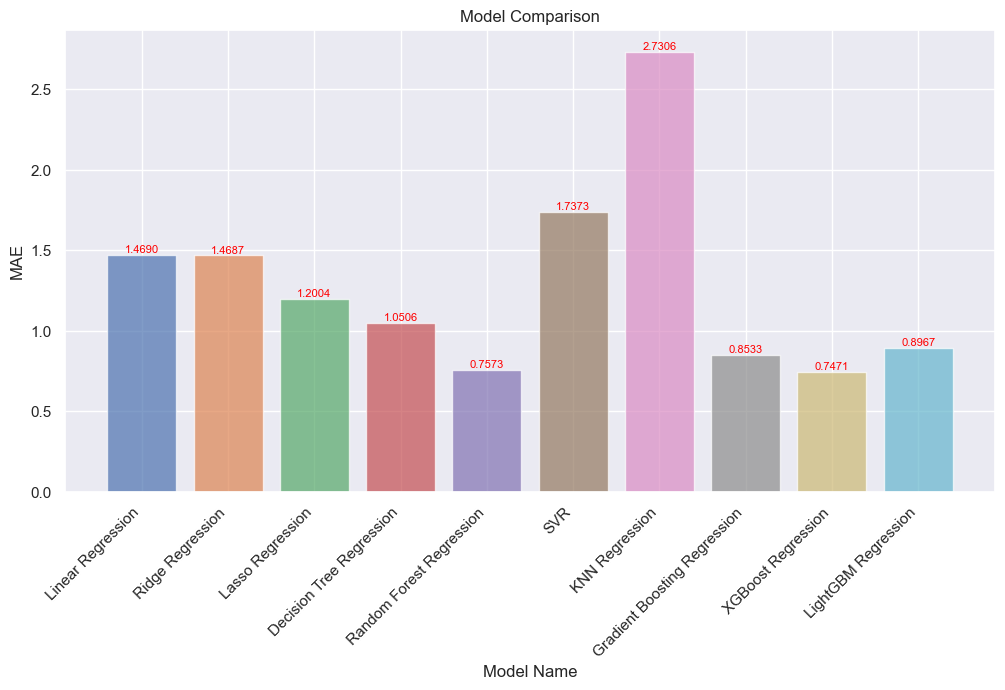

In [44]:
# Visualize the results for MAE
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    evaluations = evaluate_model(model, X_test, y_test, metrics=['mae'])
    mae_value = evaluations['mae']
    
    plt.bar(model_name, mae_value, alpha=0.7, label=f"{model_name} - MAE: {mae_value:.4f}")
    
    # Display the numerical value on top of the bar
    plt.text(model_name, mae_value + 0.001, f'{mae_value:.4f}', ha='center', va='bottom', fontsize=8, color='Red')

plt.title('Model Comparison')
plt.xlabel('Model Name')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.show()

## R2-Score Results

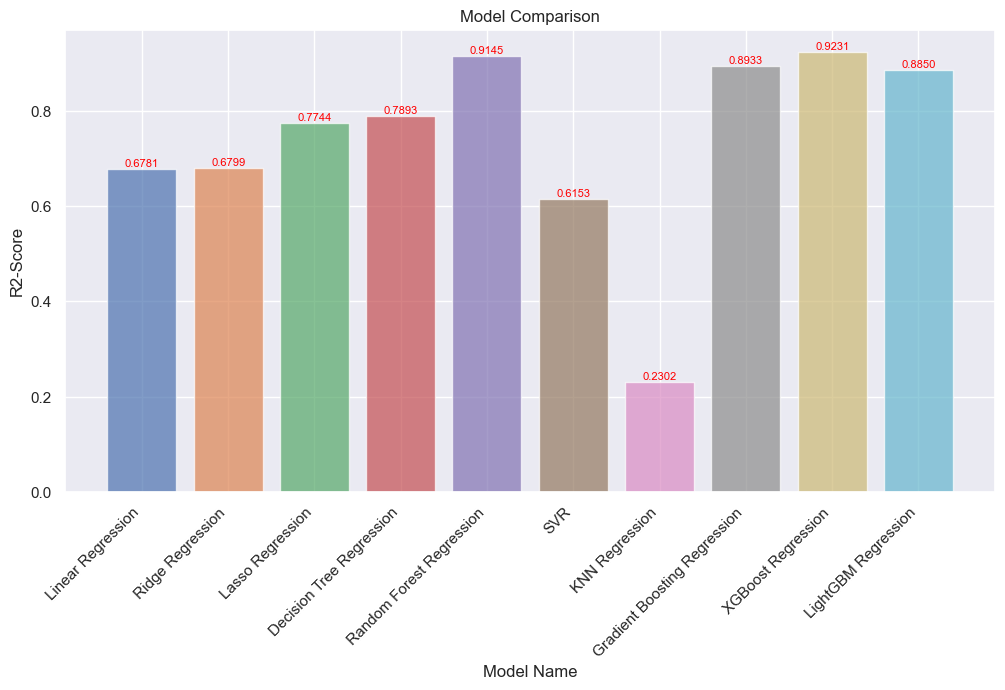

In [45]:
# Visualize the results for R2 Score
plt.figure(figsize=(12, 6))
for model_name, model in models.items():
    evaluations = evaluate_model(model, X_test, y_test, metrics=['r2'])
    r2_value = evaluations['r2']
    
    plt.bar(model_name, r2_value, alpha=0.7, label=f"{model_name} - R2: {r2_value:.4f}")
    
    # Display the numerical value on top of the bar
    plt.text(model_name, r2_value + 0.001, f'{r2_value:.4f}', ha='center', va='bottom', fontsize=8, color='Red')

plt.title('Model Comparison')
plt.xlabel('Model Name')
plt.ylabel('R2-Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Models Summary

In [46]:
# Create an empty DataFrame
model_monitor = pd.DataFrame(columns=["Model Name", "MSE", "MAE", "R2 Score"])

# Evaluate models and append results to the DataFrame
for model_name, model in models.items():
    evaluations = evaluate_model(model, X_test, y_test, metrics=['mse', 'r2', 'mae'])
    
    # Append a new row to the DataFrame
    new_row = pd.DataFrame({
        "Model Name": [model_name],
        "MSE": [evaluations['mse']],
        "MAE": [evaluations['mae']],
        "R2 Score": [evaluations['r2']]
    })
    
    model_monitor = pd.concat([model_monitor, new_row], ignore_index=True)

In [47]:
model_monitor.sort_values(by = ["R2 Score"],ascending=False)

,Model Name,MSE,MAE,R2 Score
8,XGBoost Regression,1.150474,0.747113,0.923105
4,Random Forest Regression,1.279149,0.757342,0.914505
7,Gradient Boosting Regression,1.595744,0.853276,0.893345
9,LightGBM Regression,1.720817,0.896702,0.884985
3,Decision Tree Regression,3.151899,1.050633,0.789336
2,Lasso Regression,3.375121,1.200378,0.774416
1,Ridge Regression,4.789812,1.468715,0.679862
0,Linear Regression,4.815906,1.468967,0.678118
5,SVR,5.755184,1.737280,0.615339
6,KNN Regression,11.517954,2.730561,0.230171


In [48]:
model = models["XGBoost Regression"]

In [49]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 5000x20000 with 0 Axes>

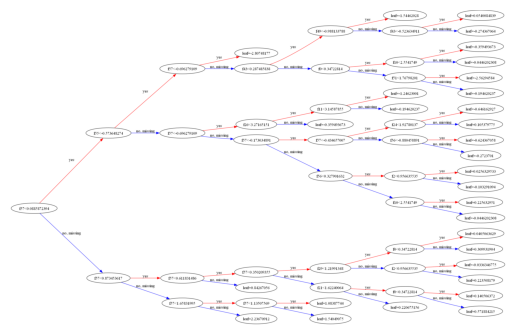

In [50]:
# Set a larger figure size
plt.figure(figsize=(50, 200))

tree_index = 0
# Adjust xlim and ylim to focus on a specific portion of the tree
plot_tree(xgb_model, num_trees=tree_index, rankdir='LR')

plt.savefig("XGBoost Regression.png", dpi=300, bbox_inches='tight')
plt.show()